# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [139]:
#Import all the necessary modules

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from IPython.display import Image

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [140]:
# load data
Pima_df = read_csv("pima-indians-diabetes+(3).csv")

In [141]:
Pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [142]:
Pima_df.sample(n=10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
191,9,123,70,44,94,33.1,0.374,40,0
363,4,146,78,0,0,38.5,0.520,67,1
215,12,151,70,40,271,41.8,0.742,38,1
6,3,78,50,32,88,31.0,0.248,26,1
349,5,0,80,32,0,41.0,0.346,37,1
596,0,67,76,0,0,45.3,0.194,46,0
353,1,90,62,12,43,27.2,0.580,24,0
311,0,106,70,37,148,39.4,0.605,22,0
662,8,167,106,46,231,37.6,0.165,43,1
256,3,111,56,39,0,30.1,0.557,30,0


# Q3 Print the datatypes of each column and the shape of the dataset 

In [143]:
Pima_df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [144]:
Pima_df.shape

(768, 9)

In [145]:
Pima_df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [146]:
Pima_df.isnull().sum()  

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [147]:
## Replace 0 in below columns with median value

Pima_df=Pima_df.replace(0,Pima_df['Pres'].median())

In [148]:
Pima_df=Pima_df.replace(0,Pima_df['skin'].median())

In [149]:
Pima_df=Pima_df.replace(0,Pima_df['mass'].median())

In [150]:
## As per my understanding Plasma should noyt have zero, therefore I am replacing zero from the column with median values

Pima_df=Pima_df.replace(0,Pima_df['Plas'].median())

In [151]:
Pima_df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,72,33.6,0.627,50,1
1,1,85,66,29,72,26.6,0.351,31,72
2,8,183,64,72,72,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,72
4,72,137,40,35,168,43.1,2.288,33,1
5,5,116,74,72,72,25.6,0.201,30,72
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,72,72,72,35.3,0.134,29,72
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,72,72,72.0,0.232,54,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [152]:
Pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,14.251302,23.937840,1.000,2.00000,5.0000,9.00000,72.00
Plas,768.0,121.363281,30.697490,44.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,41.817708,21.447990,7.000,25.00000,35.0000,72.00000,99.00
test,768.0,114.861979,94.735185,14.000,72.00000,72.0000,127.25000,846.00
mass,768.0,33.023828,8.328938,18.200,27.50000,32.4000,36.82500,72.00
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,47.223958,33.863548,1.000,1.00000,72.0000,72.00000,72.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [153]:
Pima_df.groupby(["class"]).count()

,Preg,Plas,Pres,skin,test,mass,pedi,age
class,,,,,,,,
1,268,268,268,268,268,268,268,268
72,500,500,500,500,500,500,500,500


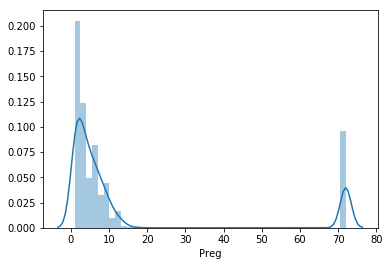

In [155]:
sns.distplot(Pima_df['Preg'])

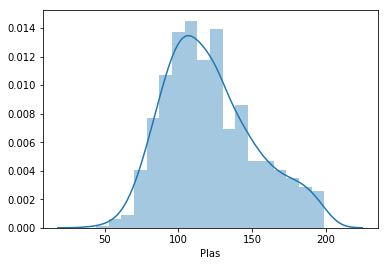

In [156]:
sns.distplot(Pima_df['Plas'])

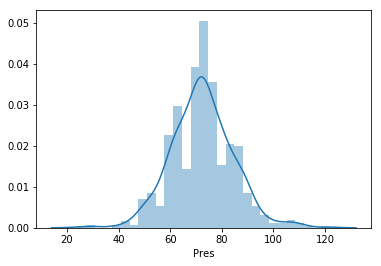

In [157]:
sns.distplot(Pima_df['Pres'])

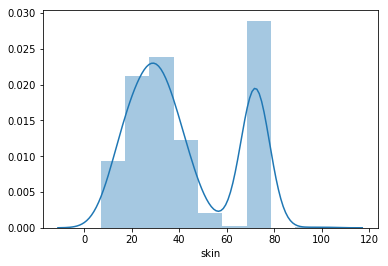

In [158]:
sns.distplot(Pima_df['skin'])

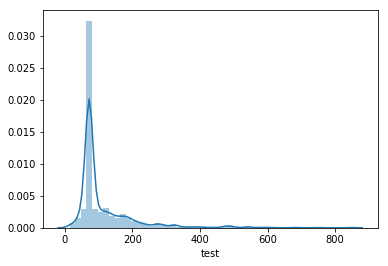

In [159]:
sns.distplot(Pima_df['test'])

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

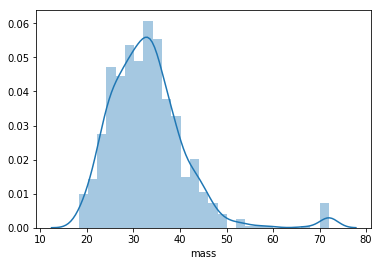

In [160]:
sns.distplot(Pima_df['mass'])

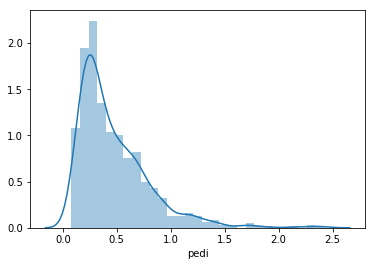

In [161]:
sns.distplot(Pima_df['pedi'])

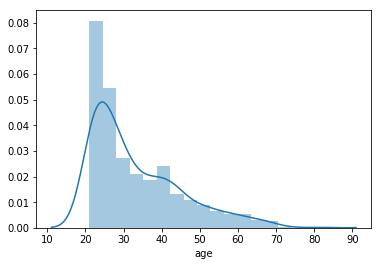

In [162]:
sns.distplot(Pima_df['age'])

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

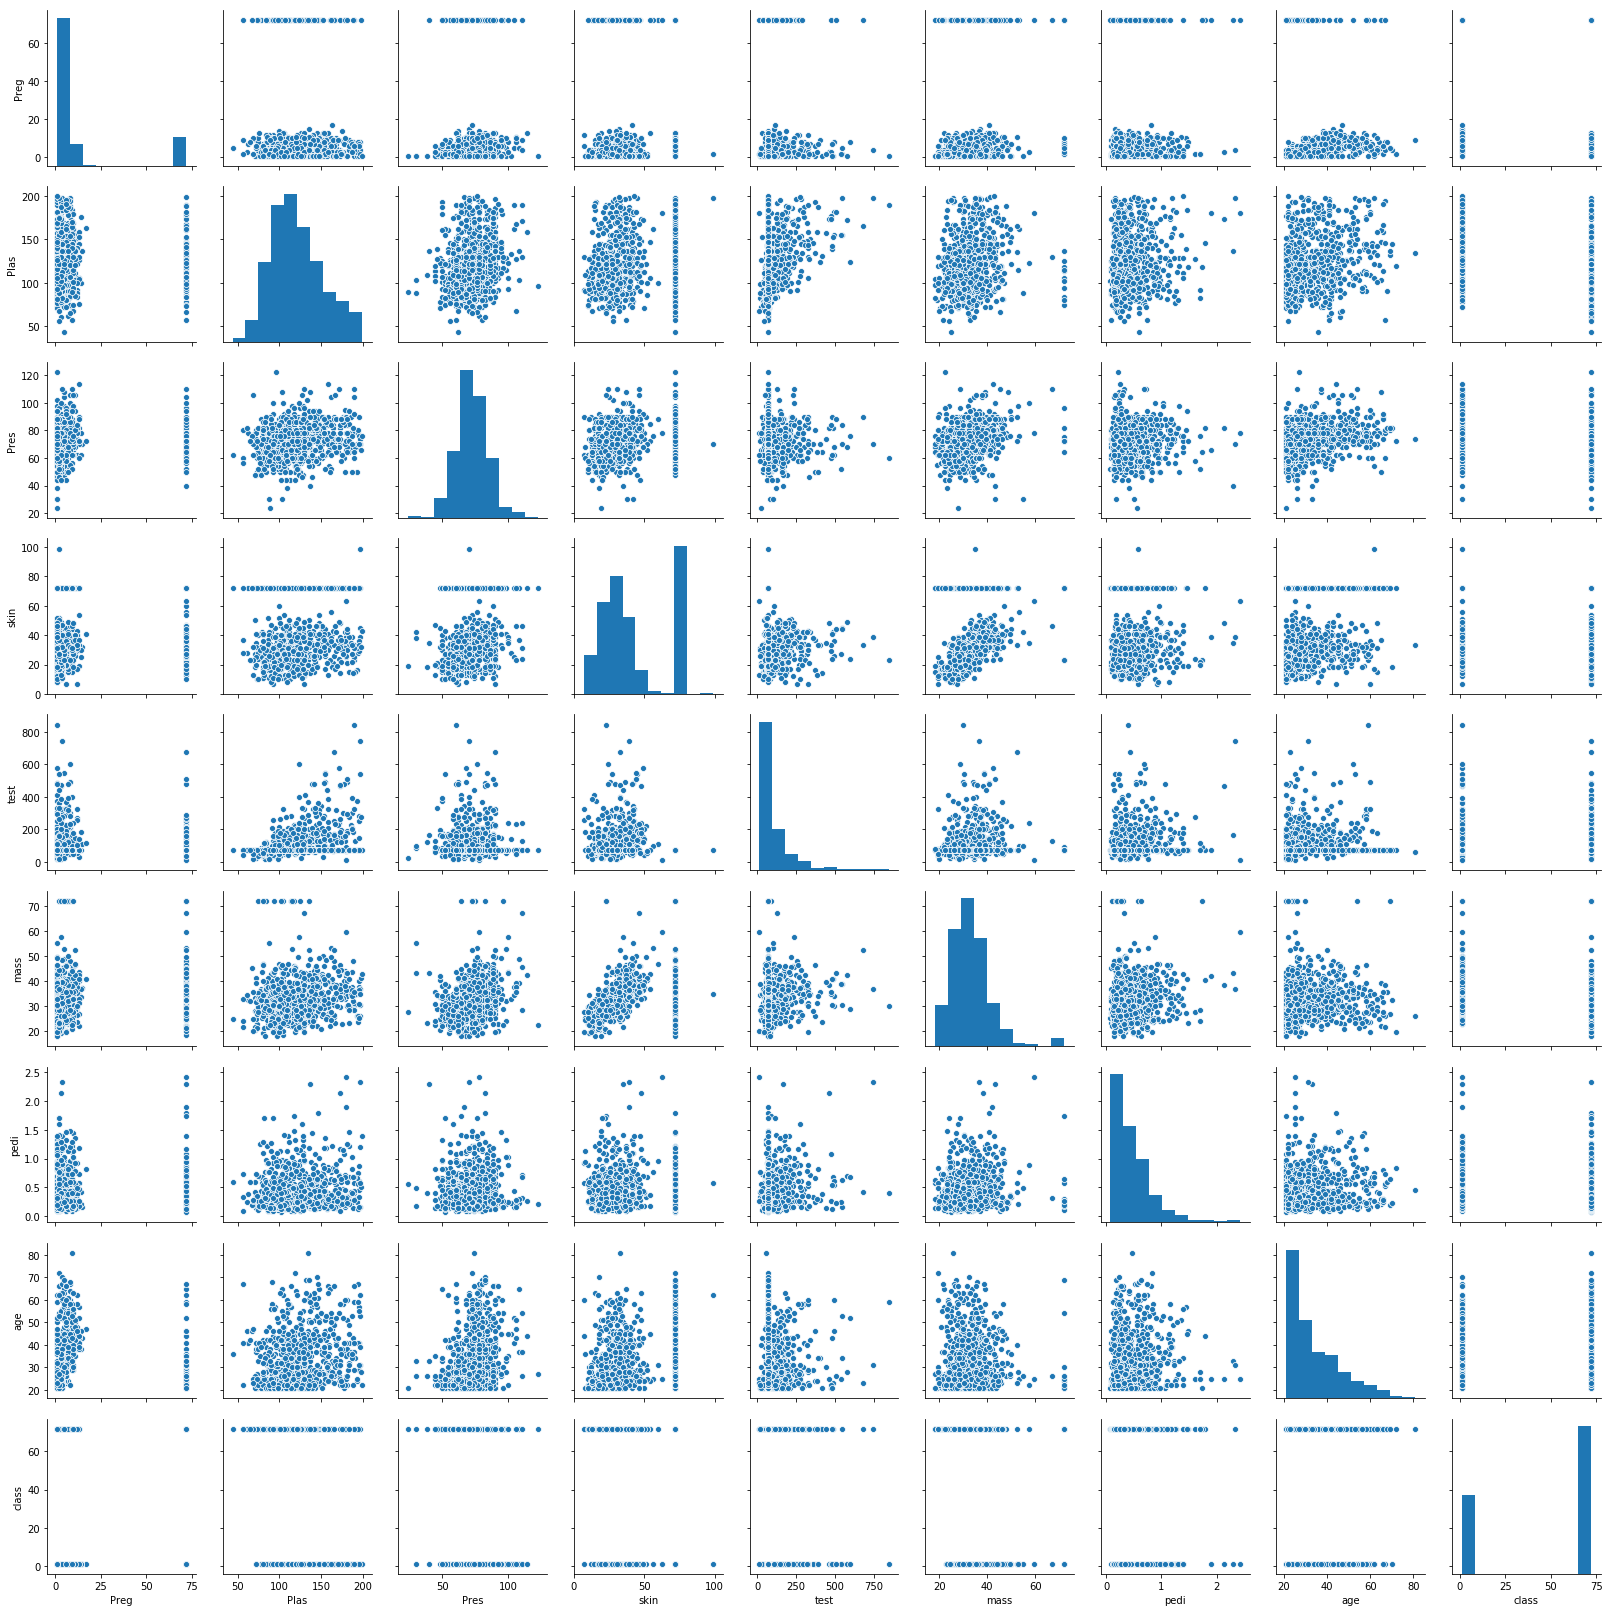

In [163]:
sns.pairplot(Pima_df)

In [164]:
Pima_df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.041521,0.074451,0.048935,0.004971,0.170564,0.059605,-0.132032,-0.025197
Plas,0.041521,1.000000,0.220870,0.118386,0.393403,0.150564,0.138811,0.268427,-0.487599
Pres,0.074451,0.220870,1.000000,0.186526,0.000218,0.244878,-0.002378,0.324915,-0.165723
skin,0.048935,0.118386,0.186526,1.000000,-0.210317,0.177172,-0.098848,0.254021,-0.136227
test,0.004971,0.393403,0.000218,-0.210317,1.000000,0.127083,0.161899,0.029252,-0.174370
mass,0.170564,0.150564,0.244878,0.177172,0.127083,1.000000,0.118691,0.004933,-0.233619
pedi,0.059605,0.138811,-0.002378,-0.098848,0.161899,0.118691,1.000000,0.033561,-0.173844
age,-0.132032,0.268427,0.324915,0.254021,0.029252,0.004933,0.033561,1.000000,-0.238356
class,-0.025197,-0.487599,-0.165723,-0.136227,-0.174370,-0.233619,-0.173844,-0.238356,1.000000


# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [165]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [168]:
array = Pima_df.values
X = array[:,0:8] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [169]:
X_train = Pima_df.head(538)
X_test = Pima_df.tail(230)

y_train = X_train.pop("class")
y_test = X_test.pop("class")

In [170]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [172]:
from IPython.display import Image  

#import pydotplus as pydot
from sklearn import tree
from os import system

train_char_label = ['No', 'Yes']

Credit_Tree_File = open('d:\Pima_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


           Imp
Preg  0.050707
Plas  0.244884
Pres  0.116801
skin  0.034274
test  0.075434
mass  0.139971
pedi  0.211835
age   0.126094


# Q10 Print the accuracy of the model & print the confusion matrix 

In [173]:
dt_model.score(X_test , y_test)

0.7086956521739131

Print the feature importance of the decision model - Optional